## import the necessary liberaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import os

## Load Dataset

In [13]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(os.path.join(os.getcwd(),"Churn_Modelling.csv"))
data.info()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Visualizations

### Univariate Analysis

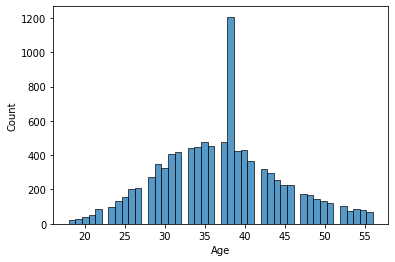

In [68]:
sns.histplot(data['Age'])

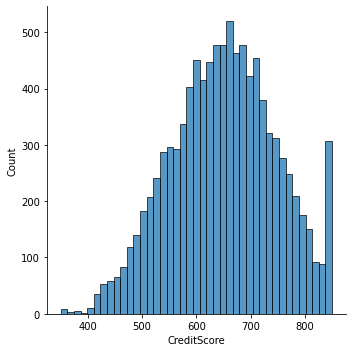

In [69]:
sns.displot(data['CreditScore'])

### Bi - Variate Analysis

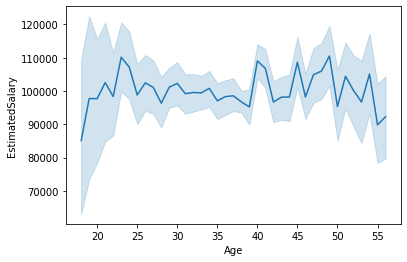

In [70]:
sns.lineplot(x=data['Age'],y=data['EstimatedSalary'])

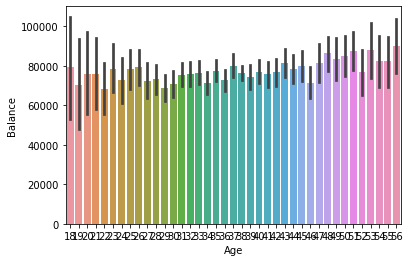

In [71]:
sns.barplot(x=data['Age'],y=data['Balance'])

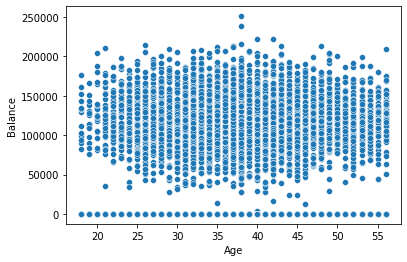

In [72]:
sns.scatterplot(x=data['Age'],y=data['Balance'])

### Multi - Variate Analysis

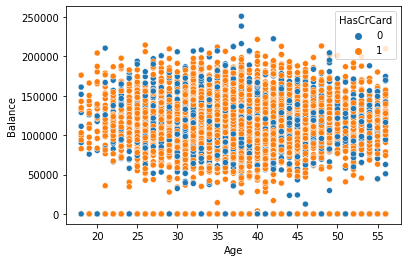

In [73]:
sns.scatterplot(x=data['Age'],y=data['Balance'],hue=data['HasCrCard'])

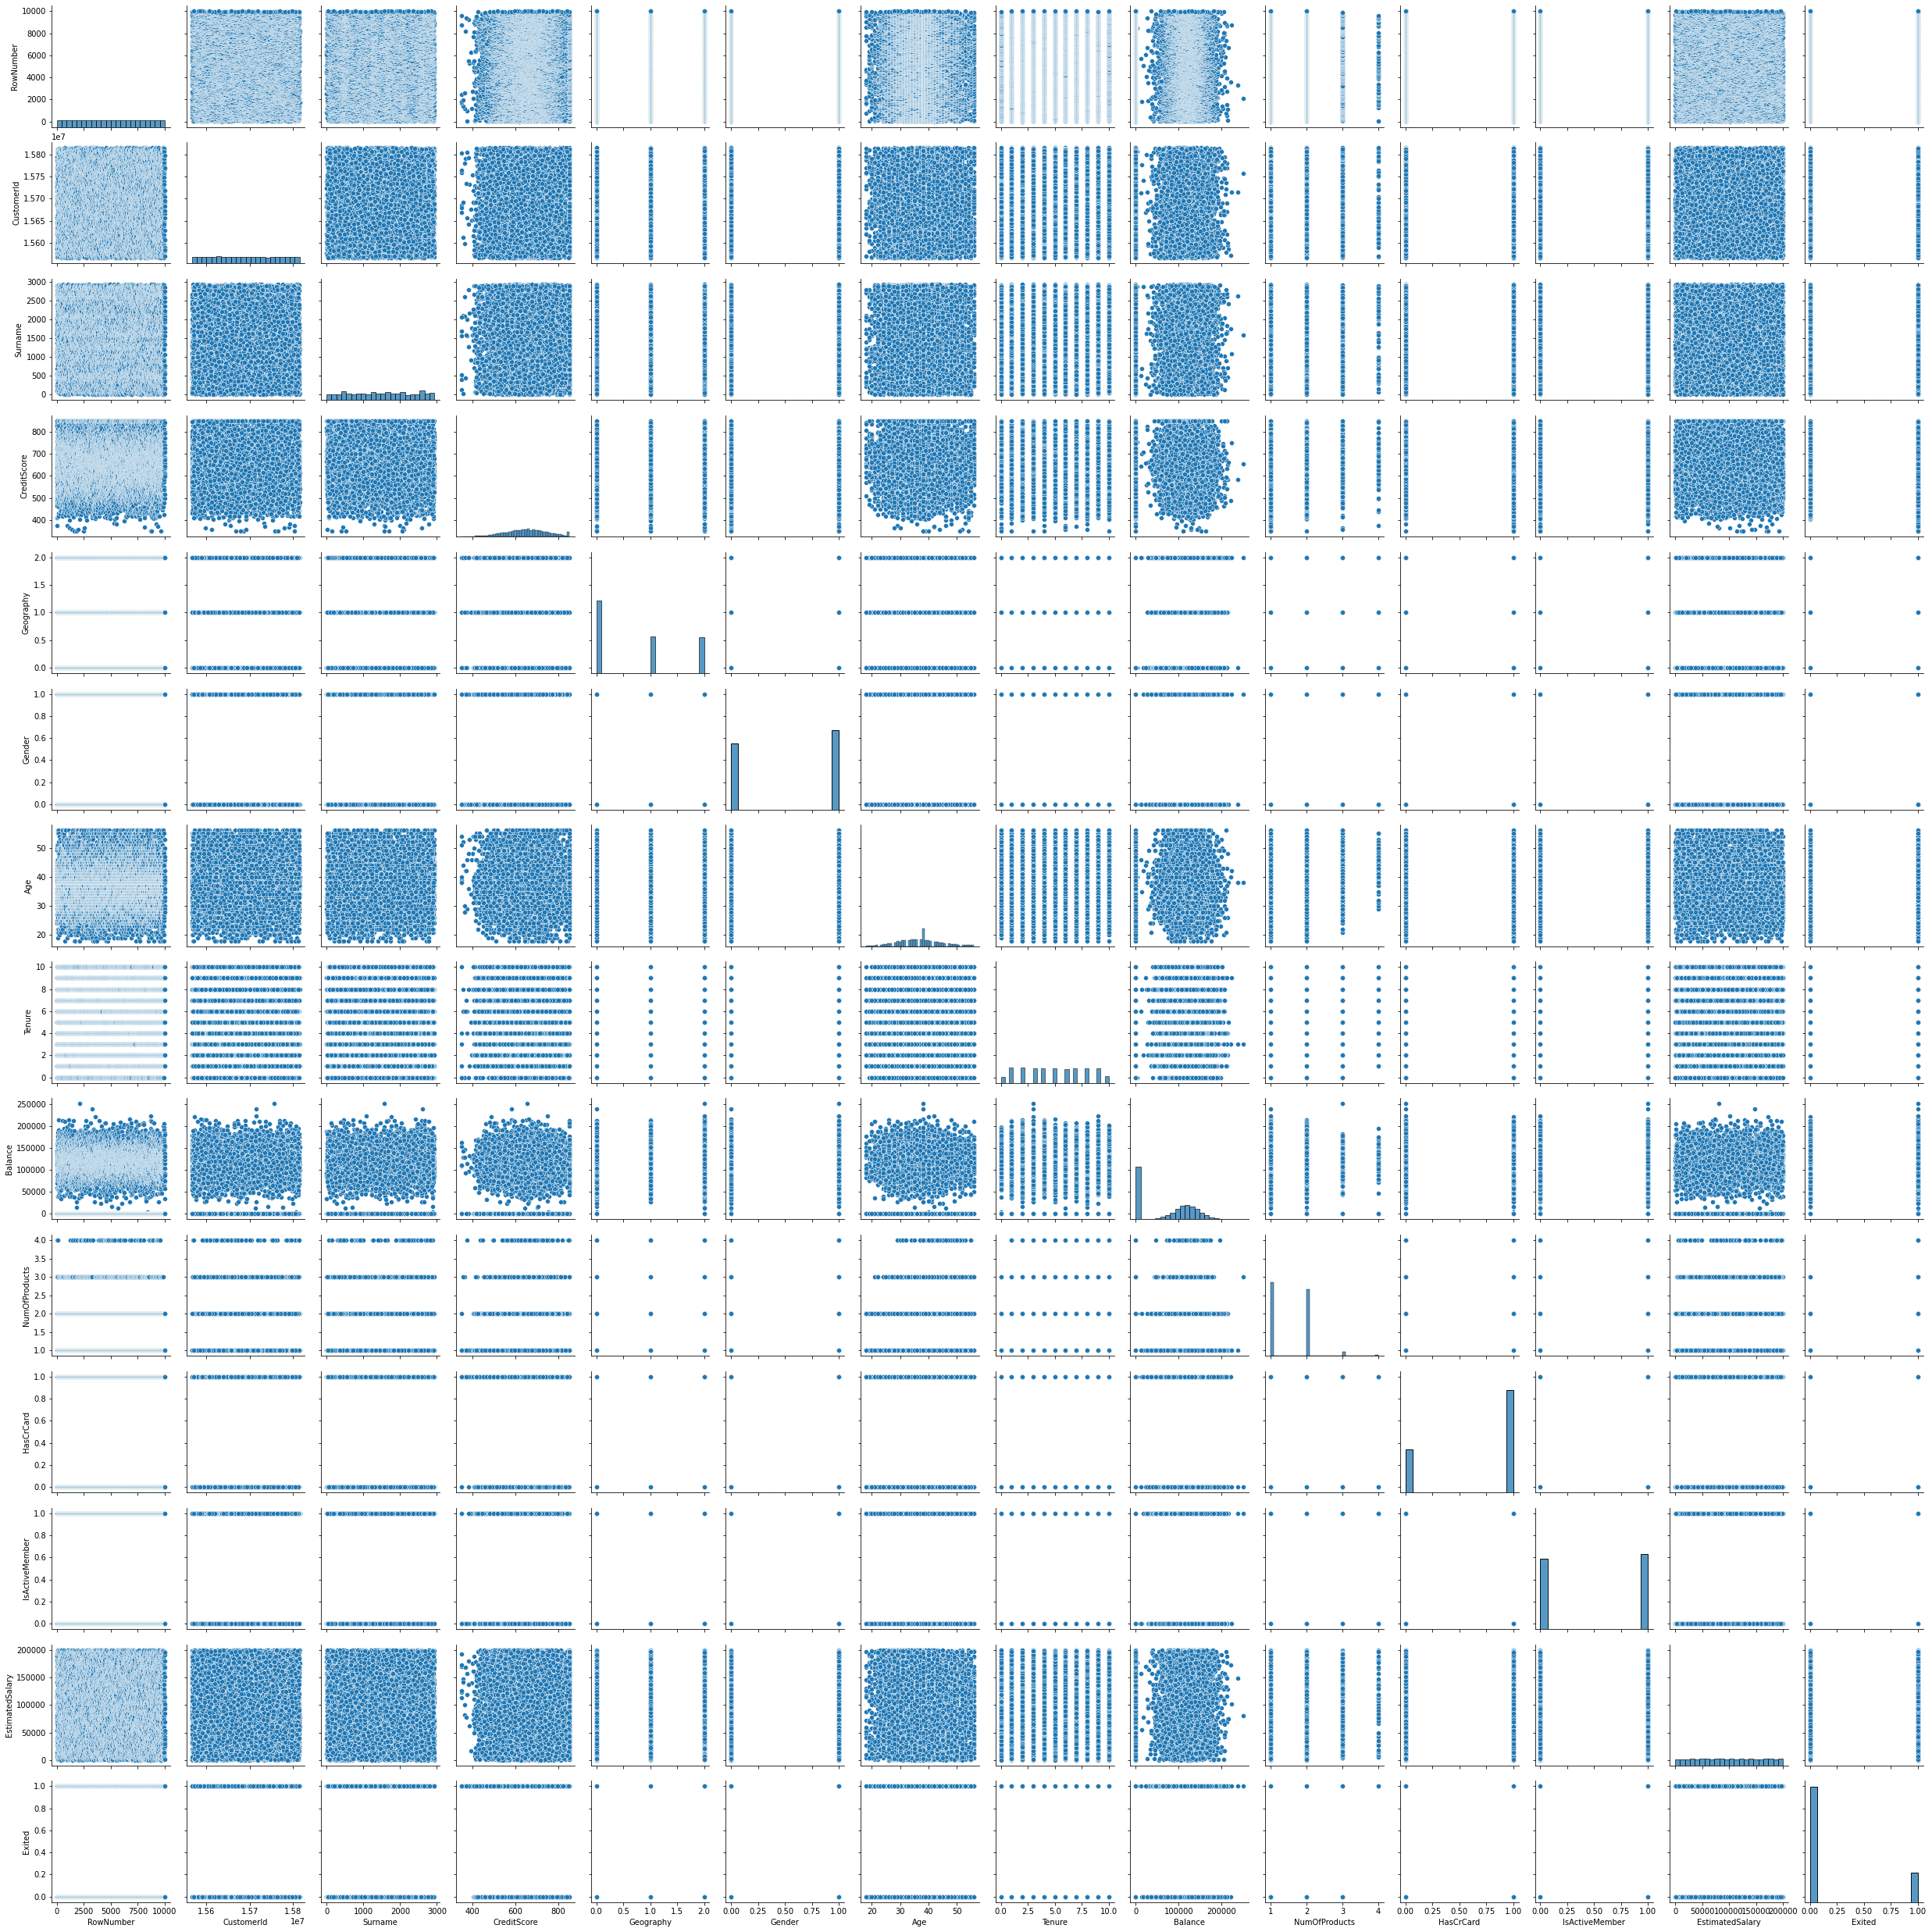

In [74]:
sns.pairplot(data)

## Descriptive Statistics

### Measure of central tendency

In [57]:
data.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,1507.774200,650.528800,0.746300,0.545700,37.009400,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,846.204311,96.653299,0.827529,0.497932,7.539894,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,0.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,773.750000,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,1542.000000,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,2238.250000,718.000000,1.000000,1.000000,41.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,2931.000000,850.000000,2.000000,1.000000,56.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [58]:
data.median(numeric_only=True)

RowNumber          5.000500e+03
CustomerId         1.569074e+07
Surname            1.542000e+03
CreditScore        6.520000e+02
Geography          0.000000e+00
Gender             1.000000e+00
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [59]:
data.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,2473.0,850.0,0.0,1.0,38.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Measures of variability

In [60]:
data.var(numeric_only=True)

RowNumber          8.334167e+06
CustomerId         5.174815e+09
Surname            7.160617e+05
CreditScore        9.341860e+03
Geography          6.848048e-01
Gender             2.479363e-01
Age                5.685000e+01
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [61]:
range = max(data['Age']) - min(data['Age'])
range

38

## Handle the Missing values

In [21]:
data.isnull().any() # There in No null value in the dataset

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Find the outliers and replace the outliers

In [22]:
q = data.quantile([0.75,0.25])
q

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0


In [23]:
iqr = q.iloc[0]-q.iloc[1]
u = q.iloc[0]+(1.5*iqr) # upper bound
l = q.iloc[1]-(1.5*iqr) # lower bound

In [24]:
iqr

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [25]:
u

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [26]:
l

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

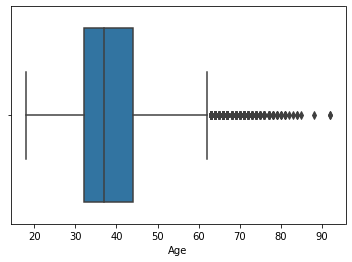

In [27]:
sns.boxplot(x = data['Age'])

In [28]:
data['Age'] = np.where(data['Age']>56,int(data['Age'].mean()),data['Age'])

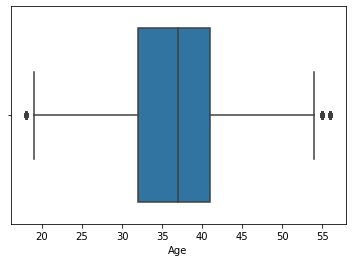

In [29]:
sns.boxplot(x = data['Age'])

## Check for Categorical columns and perform encoding

In [62]:
le = LabelEncoder()
oneh = OneHotEncoder()

In [63]:
data.info() # 3 categorical columns (Surname, Geography, Gender)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [64]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [65]:
data['Surname'] = le.fit_transform(data['Surname'])
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [66]:
data.info() # categorical columns converted into int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [67]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Split the data into dependent and independent variables

In [36]:
x = data.iloc[:,[1,3,4,5,6,7,8,9,10,11,13]] # Independent Columns
y=data['EstimatedSalary']

In [38]:
x

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,1
3,15701354,699,0,0,39,1,0.00,2,0,0,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,1


In [39]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

## Scale the independent variables

In [40]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-0.78321342, -0.32622142, -0.90188624, ...,  0.64609167,
         0.97024255,  1.97716468],
       [-0.60653412, -0.44003595,  1.51506738, ..., -1.54776799,
         0.97024255, -0.50577476],
       [-0.99588476, -1.53679418, -0.90188624, ...,  0.64609167,
        -1.03067011,  1.97716468],
       ...,
       [-1.47928179,  0.60498839, -0.90188624, ..., -1.54776799,
         0.97024255,  1.97716468],
       [-0.11935577,  1.25683526,  0.30659057, ...,  0.64609167,
        -1.03067011,  1.97716468],
       [-0.87055909,  1.46377078, -0.90188624, ...,  0.64609167,
        -1.03067011, -0.50577476]])

## Split the data into training and testing

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [42]:
x_train

array([[ 1.04438658,  0.18077059,  0.30659057, ..., -1.54776799,
        -1.03067011, -0.50577476],
       [ 1.53844637, -0.25379399, -0.90188624, ...,  0.64609167,
         0.97024255, -0.50577476],
       [-0.83896006, -1.39193932, -0.90188624, ...,  0.64609167,
        -1.03067011,  1.97716468],
       ...,
       [ 1.02575802, -0.90564086, -0.90188624, ..., -1.54776799,
         0.97024255, -0.50577476],
       [-1.0553154 ,  0.86365778,  1.51506738, ...,  0.64609167,
         0.97024255, -0.50577476],
       [ 0.3796114 , -0.46072951,  1.51506738, ...,  0.64609167,
         0.97024255, -0.50577476]])

In [43]:
x_train.shape

(7000, 11)

In [44]:
y_train

9592    114258.18
8927     83295.09
7445     95273.73
7752     92797.23
9060     70221.13
          ...    
9161     89519.47
3245    155407.21
7858      5791.85
1355     95135.27
1667    183717.94
Name: EstimatedSalary, Length: 7000, dtype: float64

In [45]:
y_train.shape

(7000,)

In [46]:
x_test

array([[-0.03969785, -0.24344722,  1.51506738, ..., -1.54776799,
         0.97024255, -0.50577476],
       [-0.42219486,  0.18077059,  1.51506738, ...,  0.64609167,
         0.97024255, -0.50577476],
       [-0.80224513, -1.55748773, -0.90188624, ...,  0.64609167,
        -1.03067011,  1.97716468],
       ...,
       [-1.12029291,  0.64637549, -0.90188624, ...,  0.64609167,
        -1.03067011, -0.50577476],
       [-1.20762467,  1.70174662,  0.30659057, ...,  0.64609167,
         0.97024255, -0.50577476],
       [ 1.34179002,  0.97747232,  1.51506738, ..., -1.54776799,
        -1.03067011, -0.50577476]])

In [47]:
x_test.shape

(3000, 11)

In [48]:
y_test

6754     34097.22
7895    100423.88
1653    118490.80
7986    163655.01
6704    183540.22
          ...    
1507      6101.41
5328    166317.71
2134     64375.40
2413    136071.05
2179    116331.42
Name: EstimatedSalary, Length: 3000, dtype: float64

In [49]:
y_test.shape

(3000,)